In [2]:
from datascience import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

## Good visualization fundamentals:

https://www.darkhorseanalytics.com/portfolio/2016/1/7/data-looks-better-naked-pie-charts 
https://www.darkhorseanalytics.com/portfolio/w24s5qofnzm4wqmsdfq98kwx035tew 
https://www.darkhorseanalytics.com/portfolio/data-looks-better-naked-bar-charts


In [3]:
# plt.style.use("ggplot")

In [4]:
# plt.style.use("fivethirtyeight")

In [5]:
child_mortality = Table.read_table("child_mortality.csv")
countries = Table.read_table("countries.csv")
poverty = Table.read_table("poverty.csv")

In [6]:
child_mortality.show(5)

geo,time,child_mortality_0_5_year_olds_dying_per_1000_born
afg,1800,468.6
afg,1801,468.6
afg,1802,468.6
afg,1803,468.6
afg,1804,468.6


In [7]:
countries.show(5)

country,gwid,name,world_6region,income_groups,landlocked,g77_and_oecd_countries,main_religion_2008,gapminder_list,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,pandg,god_id,alt_5,upper_case_name,code,number,arb1,arb2,arb3,arb4,arb5,arb6,is--country,world_4region,latitude,longitude
abkh,i0,Abkhazia,europe_central_asia,nan,nan,others,nan,Abkhazia,nan,nan,nan,nan,nan,GE-AB,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,europe,nan,nan
afg,i1,Afghanistan,south_asia,low_income,landlocked,g77,muslim,Afghanistan,Islamic Republic of Afghanistan,nan,nan,Afghanistan,AFGHANISTAN,AF,nan,AFGHANISTAN,AFG,4,nan,nan,nan,nan,nan,nan,True,asia,33,66
akr_a_dhe,i2,Akrotiri and Dhekelia,europe_central_asia,nan,coastline,others,nan,Akrotiri and Dhekelia,nan,nan,nan,nan,nan,Akrotiri_Dhekelia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,True,europe,nan,nan
alb,i3,Albania,europe_central_asia,upper_middle_income,coastline,others,muslim,Albania,nan,nan,nan,Albania,ALBANIA,AL,nan,ALBANIA,ALB,8,nan,nan,nan,nan,nan,nan,True,europe,41,20
dza,i4,Algeria,middle_east_north_africa,upper_middle_income,coastline,g77,muslim,Algeria,nan,nan,nan,Algeria,ALGERIA,DZ,nan,ALGERIA,DZA,12,nan,nan,nan,nan,nan,nan,True,africa,28,3


In [8]:
poverty.show(5)

geo,time,extreme_poverty_percent_people_below_125_a_day
alb,1996,0.2
alb,2002,0.73
alb,2004,0.53
alb,2005,0.44
alb,2008,0.2


In [9]:
selected_countries = countries.select(0, 2, 3, 4)
selected_countries.show(5)

country,name,world_6region,income_groups
abkh,Abkhazia,europe_central_asia,nan
afg,Afghanistan,south_asia,low_income
akr_a_dhe,Akrotiri and Dhekelia,europe_central_asia,nan
alb,Albania,europe_central_asia,upper_middle_income
dza,Algeria,middle_east_north_africa,upper_middle_income


In [11]:
all_joined = child_mortality.join("geo", selected_countries, "country")

In [12]:
all_joined.show(5)

geo,time,child_mortality_0_5_year_olds_dying_per_1000_born,name,world_6region,income_groups
abw,1980,26.34,Aruba,america,high_income
abw,1981,25.4,Aruba,america,high_income
abw,1982,24.6,Aruba,america,high_income
abw,1983,23.96,Aruba,america,high_income
abw,1984,23.48,Aruba,america,high_income


In [13]:
data_2014 = all_joined.where("time", are.equal_to(2014))

In [14]:
data_2014.show(5)

geo,time,child_mortality_0_5_year_olds_dying_per_1000_born,name,world_6region,income_groups
abw,2014,16.8,Aruba,america,high_income
afg,2014,93.9,Afghanistan,south_asia,low_income
ago,2014,162.2,Angola,sub_saharan_africa,upper_middle_income
alb,2014,14.4,Albania,europe_central_asia,upper_middle_income
and,2014,2.9,Andorra,europe_central_asia,high_income


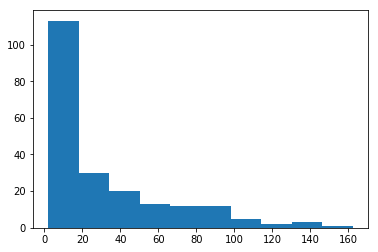

In [9]:
#Histogram
plt.hist(data_2014.column(2));


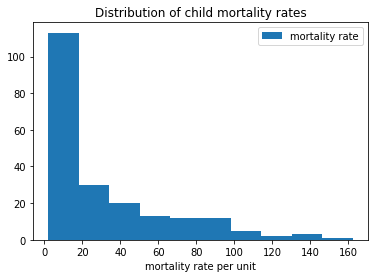

In [10]:
#add titles, legend, axes
plt.hist(data_2014.column(2), label="mortality rate");
plt.title("Distribution of child mortality rates");
plt.xlabel("mortality rate per unit")
plt.legend()


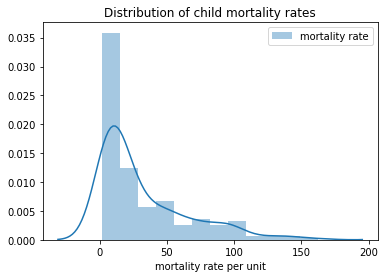

In [11]:
sns.distplot(data_2014.column(2), label="mortality rate")
plt.title("Distribution of child mortality rates");
plt.xlabel("mortality rate per unit")
plt.legend()

In [15]:
by_region = data_2014.group("world_6region", sum)

In [16]:
by_region = by_region.drop("time sum").drop("geo sum").drop("name sum").drop("income_groups sum")

In [17]:
by_region.show(5)

world_6region,child_mortality_0_5_year_olds_dying_per_1000_born sum
america,728.72
east_asia_pacific,853.55
europe_central_asia,489.9
middle_east_north_africa,439.82
south_asia,356.5


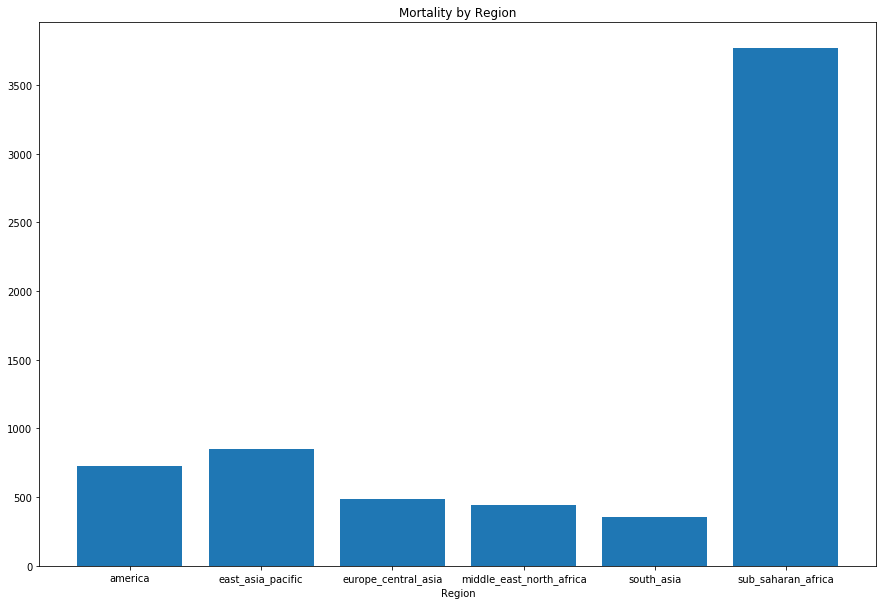

In [15]:
plt.figure(figsize=(15, 10))
plt.bar(x = "world_6region", height = "child_mortality_0_5_year_olds_dying_per_1000_born sum", data = by_region)
plt.title("Mortality by Region");
plt.xlabel("Region");

In [16]:
#line chart with time

In [18]:
child_mortality = pd.read_csv("child_mortality.csv")
countries = pd.read_csv("countries.csv")
poverty = pd.read_csv("poverty.csv")

In [19]:
countries_selected = countries.iloc[:, [0, 2, 3, 4]]

In [20]:
countries_selected.head(5)

,country,name,world_6region,income_groups
0,abkh,Abkhazia,europe_central_asia,NaN
1,afg,Afghanistan,south_asia,low_income
2,akr_a_dhe,Akrotiri and Dhekelia,europe_central_asia,NaN
3,alb,Albania,europe_central_asia,upper_middle_income
4,dza,Algeria,middle_east_north_africa,upper_middle_income


In [21]:
all_joined = child_mortality.merge(countries_selected, how="left", right_on="country", left_on = "geo")

In [22]:
all_joined.head(5)

,geo,time,child_mortality_0_5_year_olds_dying_per_1000_born,country,name,world_6region,income_groups
0,afg,1800,468.6,afg,Afghanistan,south_asia,low_income
1,afg,1801,468.6,afg,Afghanistan,south_asia,low_income
2,afg,1802,468.6,afg,Afghanistan,south_asia,low_income
3,afg,1803,468.6,afg,Afghanistan,south_asia,low_income
4,afg,1804,468.6,afg,Afghanistan,south_asia,low_income


In [24]:
with_poverty = all_joined.merge(poverty, how="left", left_on = ["geo", "time"], right_on = ["geo", "time"])

In [25]:
with_poverty.head(5)

,geo,time,child_mortality_0_5_year_olds_dying_per_1000_born,country,name,world_6region,income_groups,extreme_poverty_percent_people_below_125_a_day
0,afg,1800,468.6,afg,Afghanistan,south_asia,low_income,NaN
1,afg,1801,468.6,afg,Afghanistan,south_asia,low_income,NaN
2,afg,1802,468.6,afg,Afghanistan,south_asia,low_income,NaN
3,afg,1803,468.6,afg,Afghanistan,south_asia,low_income,NaN
4,afg,1804,468.6,afg,Afghanistan,south_asia,low_income,NaN


In [26]:
with_data = with_poverty[with_poverty.iloc[:, 7].isnull() == False]

In [27]:
with_data = with_data.rename(columns = {'child_mortality_0_5_year_olds_dying_per_1000_born': "mortality", "extreme_poverty_percent_people_below_125_a_day": "poverty_rate"})

In [28]:
with_data.head(5)

,geo,time,mortality,country,name,world_6region,income_groups,poverty_rate
412,alb,1996,31.8,alb,Albania,europe_central_asia,upper_middle_income,0.20
418,alb,2002,23.6,alb,Albania,europe_central_asia,upper_middle_income,0.73
420,alb,2004,21.5,alb,Albania,europe_central_asia,upper_middle_income,0.53
421,alb,2005,20.5,alb,Albania,europe_central_asia,upper_middle_income,0.44
424,alb,2008,17.9,alb,Albania,europe_central_asia,upper_middle_income,0.20


https://seaborn.pydata.org/generated/seaborn.pairplot.html

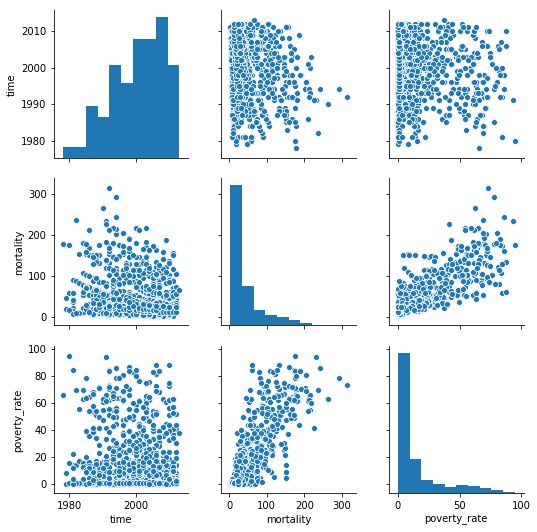

In [25]:

sns.pairplot(with_data)

In [29]:
just_a_few = with_data[with_data["time"] == 2000][["mortality","income_groups"]]

In [31]:
just_a_few.head(5)

,mortality,income_groups
874,216.7,upper_middle_income
1306,20.2,upper_middle_income
1990,5.5,high_income
2854,88.0,low_income
3286,14.4,upper_middle_income


In [33]:
few_high = just_a_few[just_a_few["income_groups"] == 'high_income']["mortality"]
few_low = just_a_few[just_a_few["income_groups"] == 'low_income']["mortality"]
few_lmid = just_a_few[just_a_few["income_groups"] == 'lower_middle_income']["mortality"]
few_umid = just_a_few[just_a_few["income_groups"] == 'upper_middle_income']["mortality"]

In [34]:
few_high.head(5)

1990     5.5
3502     5.8
6526     6.2
7426    10.9
9219     8.3
Name: mortality, dtype: float64

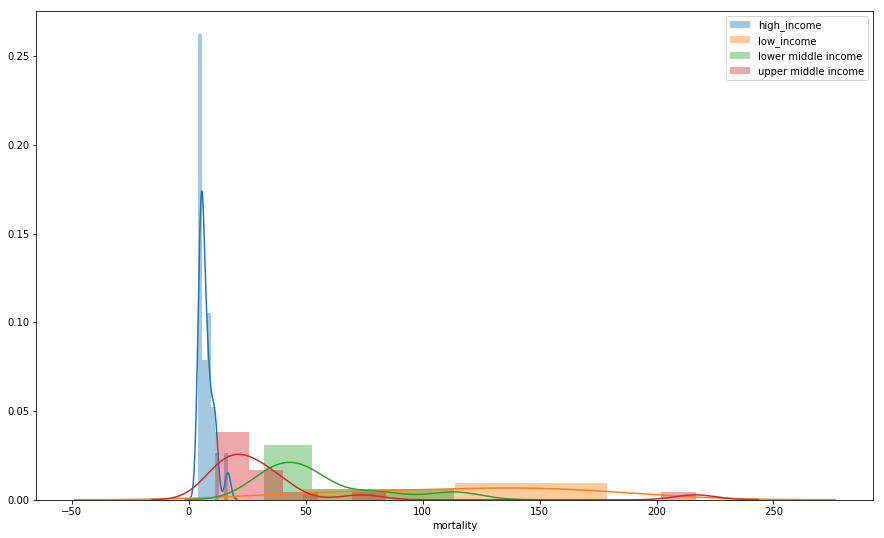

In [30]:
plt.figure(figsize=(15, 9))
sns.distplot(few_high, label="high_income")
sns.distplot(few_low, label="low_income")
sns.distplot(few_lmid, label="lower middle income")
sns.distplot(few_umid, label="upper middle income")
plt.legend()

In [36]:
select_3 = with_data[["mortality", "poverty_rate", "income_groups"]]

In [37]:
select_3.head(5)

,mortality,poverty_rate,income_groups
412,31.8,0.20,upper_middle_income
418,23.6,0.73,upper_middle_income
420,21.5,0.53,upper_middle_income
421,20.5,0.44,upper_middle_income
424,17.9,0.20,upper_middle_income


Text(0.5,1,'poverty_rate vs mortality_rate')

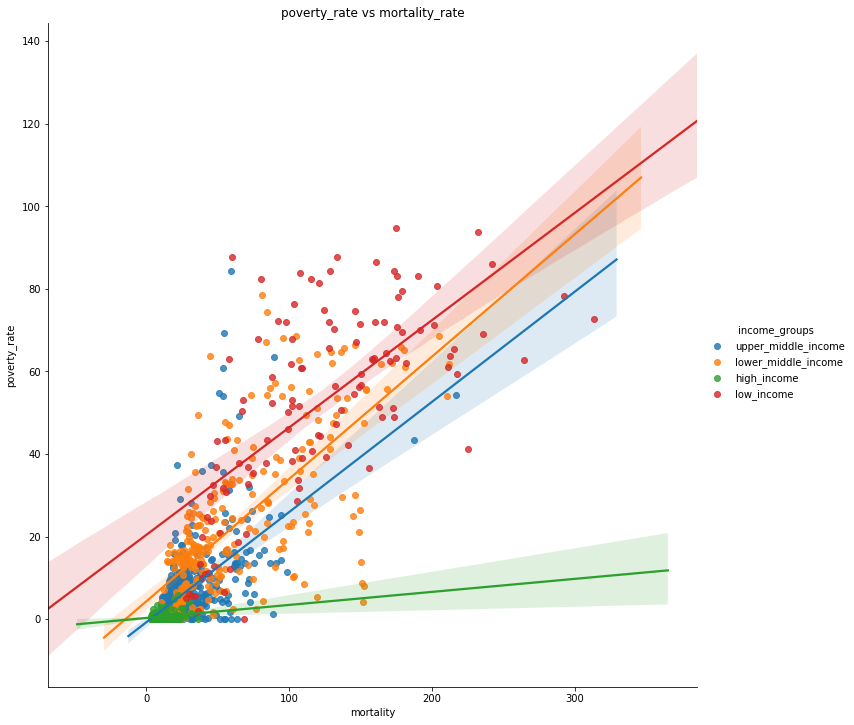

In [32]:
sns.lmplot(x = "mortality", y="poverty_rate", hue="income_groups", data = select_3, height= 10)
plt.title("poverty_rate vs mortality_rate")

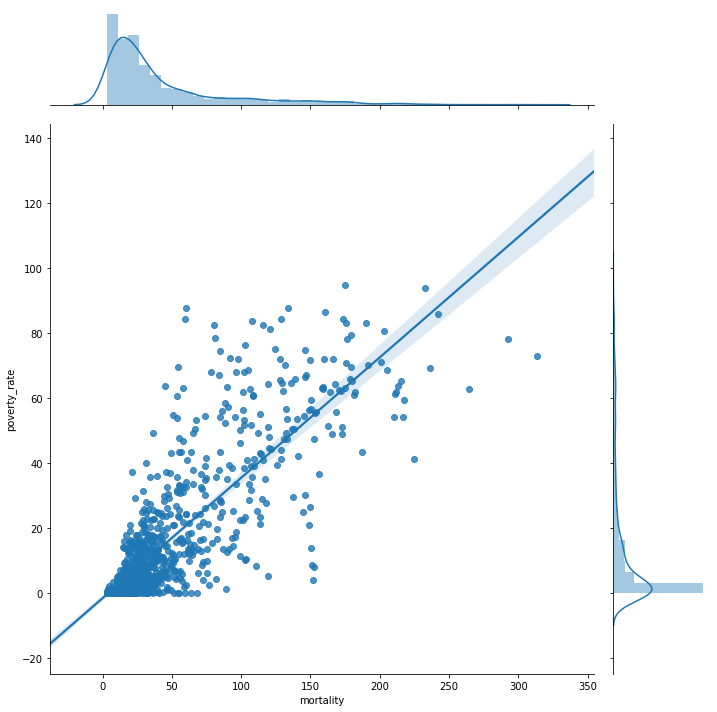

In [33]:
sns.jointplot(x = "mortality", y="poverty_rate", kind="reg", data = select_3, height= 10)

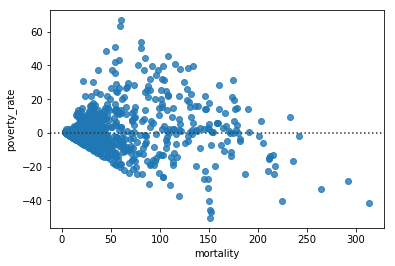

In [34]:
sns.residplot(x = "mortality", y="poverty_rate", data = select_3)

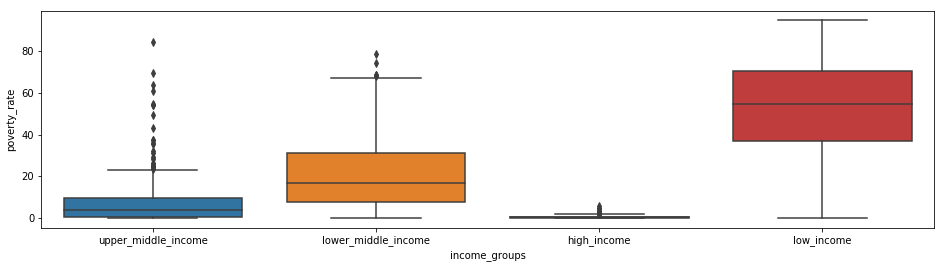

In [35]:
plt.figure(figsize=(16, 4));
sns.boxplot(x = "income_groups", y="poverty_rate", data = select_3)

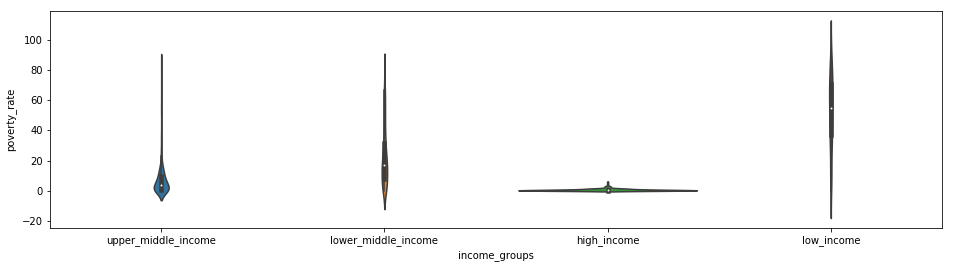

In [36]:
plt.figure(figsize=(16, 4));
sns.violinplot(x = "income_groups", y="poverty_rate", data = select_3);

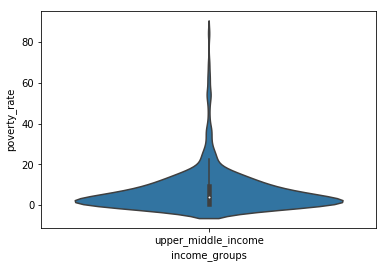

In [37]:
sns.violinplot(x = "income_groups", y="poverty_rate", data = select_3[select_3["income_groups"] == "upper_middle_income"]);

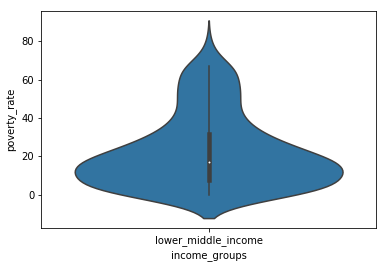

In [38]:
sns.violinplot(x = "income_groups", y="poverty_rate", data = select_3[select_3["income_groups"] == "lower_middle_income"]);

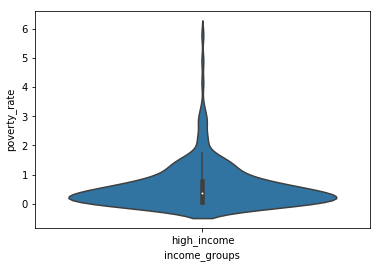

In [39]:
sns.violinplot(x = "income_groups", y="poverty_rate", data = select_3[select_3["income_groups"] == "high_income"]);

Text(0.5,1,'Low Income')

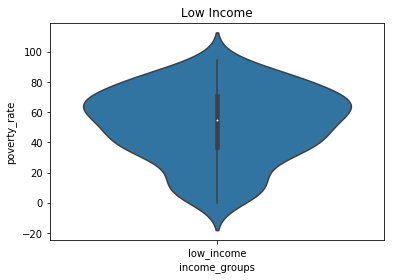

In [40]:
sns.violinplot(x = "income_groups", y="poverty_rate", data = select_3[select_3["income_groups"] == "low_income"]);
plt.title("Low Income")

In [38]:
us_data = with_data[with_data["name"] == "United States"]

In [39]:
us_data.head(5)

,geo,time,mortality,country,name,world_6region,income_groups,poverty_rate
38458,usa,1986,12.4,usa,United States,america,high_income,0.68
38463,usa,1991,10.9,usa,United States,america,high_income,0.67
38466,usa,1994,9.8,usa,United States,america,high_income,0.67
38469,usa,1997,8.9,usa,United States,america,high_income,1.00
38472,usa,2000,8.4,usa,United States,america,high_income,0.67


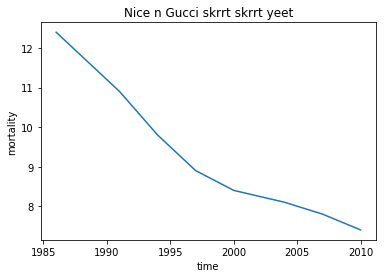

In [43]:
plt.title("Nice n Gucci skrrt skrrt yeet")
sns.lineplot(x= "time", y="mortality", data = us_data);

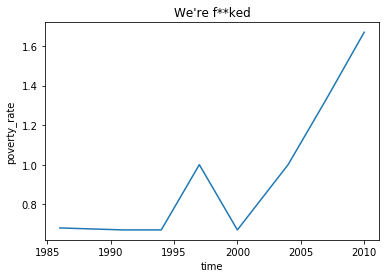

In [44]:
#us plot of poverty
plt.title("We're f**ked")
sns.lineplot(x= "time", y="poverty_rate", data = us_data);

https://seaborn.pydata.org/examples/index.html

https://python-graph-gallery.com

# Personal Note:
# Thank you all for an amazing semester 

Love you guys and I'm grateful for the opportunity to teach you all.  I wish you guys the very best!  I had a blast and I hope you did as well.  Please feel free to contact me at `oscar.syu@berkeley.edu about anything`.



Say hi to me if you guys see me!!